In [3]:
import glob
import json
main_path = '/home/diego/Downloads/data_sqm/en plataforma/**.json'

paths = glob.glob(main_path, recursive=True)
print(len(paths))

123


In [44]:
list_of_percentages = []
for path in paths:
    with open(path, 'r') as f:
        data = json.load(f)
        altura_promedio = data['altura sal (cm) (lidar)']
        altura_promedio_diagonal_1 = data['diagonal1']['mean']*100
        altura_promedio_diagonal_2 = data['diagonal2']['mean']*100
        #print(altura_promedio, altura_promedio_diagonal_1, altura_promedio_diagonal_2)
        dif_percentage_total_diag_1 = (altura_promedio_diagonal_1-altura_promedio)/altura_promedio*100
        dif_percentage_total_diag_2 = (altura_promedio_diagonal_2-altura_promedio)/altura_promedio*100
        #print(dif_percentage_total_diag_1, dif_percentage_total_diag_2)
        list_of_percentages.append([path.split('/')[-1][:-5], altura_promedio, altura_promedio_diagonal_1, dif_percentage_total_diag_1, altura_promedio_diagonal_2,dif_percentage_total_diag_2])

In [45]:
import numpy as np
import pandas as pd
array_of_percentages = np.array(list_of_percentages)
df_of_percentages = pd.DataFrame(array_of_percentages, columns=['Nombre', 'Altura Promedio HS', 'Altura D1', '% Variación D1/HS', 'Altura 2', '% Variación D2/HS'])
df_of_percentages
# export df
df_of_percentages.to_csv('/home/diego/Downloads/ResumenAlturas.csv')

In [58]:
new_array_of_percentages = array_of_percentages[:, [3, 5]].astype(float)
mean = np.mean(new_array_of_percentages, axis=0)
median = np.median(new_array_of_percentages, axis=0)
std = np.std(new_array_of_percentages, axis=0)
min = np.min(new_array_of_percentages, axis=0)
max = np.max(new_array_of_percentages, axis=0)
columns = ['Resumen % Variación Diagonal 1', 'Resumen % Variación Diagonal 2']
indexes = ['Promedio', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Máximo']
df = pd.DataFrame([mean, median, std, min, max], columns=columns, index=indexes)
df

,Resumen % Variación Diagonal 1,Resumen % Variación Diagonal 2
Promedio,-30.768337,-27.154146
Mediana,-7.120343,-0.548773
Desviación Estándar,191.433281,252.730572
Mínimo,-2072.823758,-2705.303743
Máximo,287.224523,513.910495


In [61]:
# remove outliers
def remove_outliers(data, threshold=3):
    q1 = np.percentile(data, 10)
    q3 = np.percentile(data, 90)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[(data > lower_bound) & (data < upper_bound)]

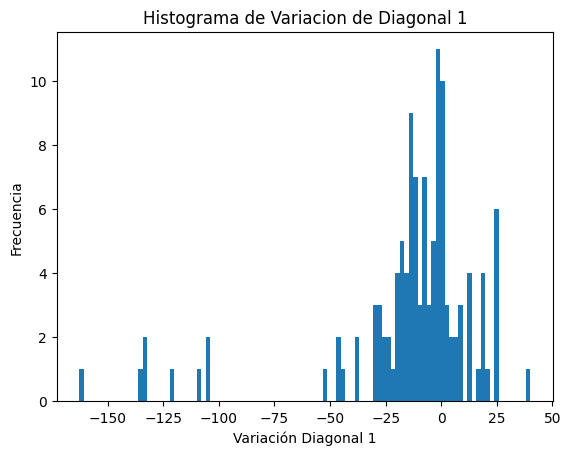

Promedio: -14.296536663571072, Mediana: -7.045898736062348, Desviación: 34.16782016795979


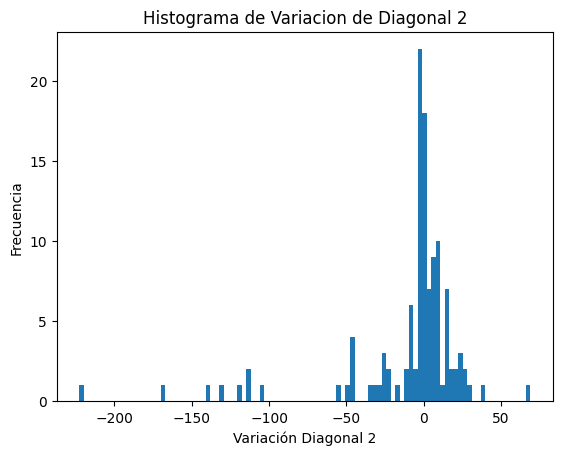

Promedio: -9.543023660048286, Mediana: -0.5487728005911819, Desviación: 39.99928934397408


In [68]:
import matplotlib.pyplot as plt
vd1hs = array_of_percentages[:, 3].astype(float)
vd1hs = remove_outliers(vd1hs)
vd2hs = array_of_percentages[:, 5].astype(float)
vd2hs = remove_outliers(vd2hs)
plt.hist(vd1hs, bins=100)
plt.xlabel('Variación Diagonal 1')
plt.ylabel('Frecuencia')
plt.title('Histograma de Variacion de Diagonal 1')
plt.show()
mean_vd1 = np.mean(vd1hs)
median_vd1 = np.median(vd1hs)
std_vd1 = np.std(vd1hs)
print(f"Promedio: {mean_vd1}, Mediana: {median_vd1}, Desviación: {std_vd1}")
plt.hist(vd2hs, bins=100)
plt.xlabel('Variación Diagonal 2')
plt.ylabel('Frecuencia')
plt.title('Histograma de Variacion de Diagonal 2')
plt.show()
mean_vd2 = np.mean(vd2hs)
median_vd2 = np.median(vd2hs)
std_vd2 = np.std(vd2hs)
print(f"Promedio: {mean_vd2}, Mediana: {median_vd2}, Desviación: {std_vd2}")